In [61]:
# Import library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
# Load Dataset
df = pd.read_csv("Data_Mahasiswa.csv", delimiter=';')

In [85]:
# Cek tipe data
print(df.dtypes)

Email Address                                                                                                                                          object
Nama Lengkap Mahasiswa                                                                                                                                 object
NIM                                                                                                                                                    object
Program Studi Mahasiswa                                                                                                                                object
Angkatan Mahasiswa                                                                                                                                     object
Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?                                                                                   object
Apakah Anda biasanya menggunakan media sosial melalu

In [87]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=[np.number])

In [89]:
# Jika tidak ada kolom numerik, lakukan encoding pada kolom kategorikal
if df_numeric.shape[1] == 0:
    label_encoders = {}
    for col in df.columns:
        if df[col].dtype == 'object':  # Hanya encode kolom kategorikal
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le

    # Pilih kembali kolom numerik setelah encoding
    df_numeric = df.select_dtypes(include=[np.number])

In [91]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [97]:
# Covariance Matrix (Matriks Kovarians)
cov_matrix = np.cov(X_scaled, rowvar=False)
print("\nMatriks Kovarians:")
print(cov_matrix)


Matriks Kovarians:
1.00197628458498


In [99]:
# Variance (Variansi)
print(f"\nVariansi yang dijelaskan oleh komponen pertama: {pca.explained_variance_ratio_[0]:.2%}")


Variansi yang dijelaskan oleh komponen pertama: 100.00%


In [93]:
# PCA dengan 1 komponen
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [103]:
# Principal Components (Komponen Utama)
print("\nPrincipal Components (Komponen Utama):")
print(X_pca[:10]) 


Principal Components (Komponen Utama):
[[ 1.07658956]
 [-0.99269357]
 [ 1.15322967]
 [ 1.61307037]
 [ 0.08026805]
 [-1.45253427]
 [-0.68613311]
 [-0.37957265]
 [ 0.15690817]
 [ 1.38315002]]


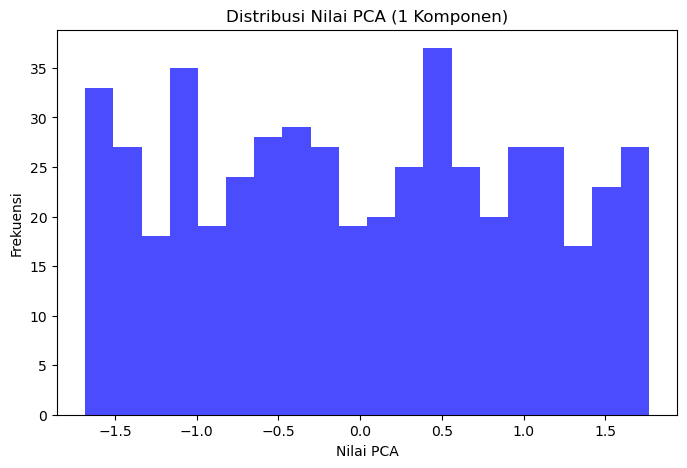

In [95]:
# Visualisasi hasil PCA dalam bentuk histogram
plt.figure(figsize=(8, 5))
plt.hist(X_pca, bins=20, color='blue', alpha=0.7)
plt.xlabel("Nilai PCA")
plt.ylabel("Frekuensi")
plt.title("Distribusi Nilai PCA (1 Komponen)")
plt.show()